Author: Nik Alleyne<br>
Author Blog:    https://www.securitynik.com <br>
Author GitHub:  github.com/securitynik <br>
Author Books: 
        [ 
                
                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/"
        ]


### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.

## 25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs non suspicious

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious - Version 2 - more detailed  <br><br>


With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.



In [ ]:
# This is an updated version to the previous #25 notebook

In [1]:
# Read some necessary libraries
import numpy as np
import os
import glob

In [2]:
# Create a list to store the executable file paths
exe_files_list = []

# Append the file and paths in a particular directory to the list
for file_name in glob.glob(pathname='d:/TOOLS/*.exe'):
    print(f'[*] Appending {file_name} to exe_files_list')

    # Adding the files to the list
    exe_files_list.append(file_name)

print(f'Added {len(exe_files_list)} files')

[*] Appending d:/TOOLS\memdump.exe to exe_files_list
[*] Appending d:/TOOLS\mingw-w64-install.exe to exe_files_list
[*] Appending d:/TOOLS\OpenLiveview- VInstallerv0.9.1.exe to exe_files_list
[*] Appending d:/TOOLS\Opera_84.0.4316.42_Setup_x64.exe to exe_files_list
[*] Appending d:/TOOLS\OWASP-ZAP_2_7_0_windows.exe to exe_files_list
[*] Appending d:/TOOLS\PEInfo.exe to exe_files_list
[*] Appending d:/TOOLS\PEview.exe to exe_files_list
[*] Appending d:/TOOLS\putty.exe to exe_files_list
[*] Appending d:/TOOLS\python-3.8.5-amd64.exe to exe_files_list
[*] Appending d:/TOOLS\rcsetup153.exe to exe_files_list
[*] Appending d:/TOOLS\realvnc-4-1-1-vnc-4_1_1-x86_win32.exe to exe_files_list
[*] Appending d:/TOOLS\regil.exe to exe_files_list
[*] Appending d:/TOOLS\Rekall_1.7.2.p1_Hurricane.Ridge_x64.exe to exe_files_list
[*] Appending d:/TOOLS\Rubeus.exe to exe_files_list
[*] Appending d:/TOOLS\SEH-Demo.exe to exe_files_list
[*] Appending d:/TOOLS\SharPersist.exe to exe_files_list
[*] Appending d:

In [3]:
# Review the list 
exe_files_list

['d:/TOOLS\\memdump.exe',
 'd:/TOOLS\\mingw-w64-install.exe',
 'd:/TOOLS\\OpenLiveview- VInstallerv0.9.1.exe',
 'd:/TOOLS\\Opera_84.0.4316.42_Setup_x64.exe',
 'd:/TOOLS\\OWASP-ZAP_2_7_0_windows.exe',
 'd:/TOOLS\\PEInfo.exe',
 'd:/TOOLS\\PEview.exe',
 'd:/TOOLS\\putty.exe',
 'd:/TOOLS\\python-3.8.5-amd64.exe',
 'd:/TOOLS\\rcsetup153.exe',
 'd:/TOOLS\\realvnc-4-1-1-vnc-4_1_1-x86_win32.exe',
 'd:/TOOLS\\regil.exe',
 'd:/TOOLS\\Rekall_1.7.2.p1_Hurricane.Ridge_x64.exe',
 'd:/TOOLS\\Rubeus.exe',
 'd:/TOOLS\\SEH-Demo.exe',
 'd:/TOOLS\\SharPersist.exe',
 'd:/TOOLS\\SharpView.exe',
 'd:/TOOLS\\shellcode_launcher.exe',
 'd:/TOOLS\\timestomp.exe',
 'd:/TOOLS\\UltraVNC_1_2_40_X64_Setup.exe',
 'd:/TOOLS\\velociraptor-v0.6.3-windows-amd64.exe',
 'd:/TOOLS\\wce.exe',
 'd:/TOOLS\\winpmem-2.1.post4.exe',
 'd:/TOOLS\\WinPrefetchView.exe',
 'd:/TOOLS\\winrar-x64-550.exe',
 'd:/TOOLS\\xampp-windows-x64-7.3.22-0-VC15-installer.exe',
 'd:/TOOLS\\xampp-windows-x64-7.4.10-0-VC15-installer.exe']

In [4]:
# Take a sample file
# This produces the following output for the first 8 bytes
# Note, change the values below if you wish to see more bytes
# I'm using 8 for easier clarity of the output

# We need to get out of this binary format
f = open(file=exe_files_list[0], mode='rb')
f.read(1024)

b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\xff\xff\x00\x00\xb8\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x00\x00\x00\x0e\x1f\xba\x0e\x00\xb4\t\xcd!\xb8\x01L\xcd!This program cannot be run in DOS mode.\r\r\n$\x00\x00\x00\x00\x00\x00\x00PE\x00\x00L\x01\x04\x00\xf3\xfe&A\x00\x00\x00\x00\x00\x00\x00\x00\xe0\x00\x0f\x03\x0b\x01\x028\x00\x12\x00\x00\x00\x1a\x00\x00\x00\x02\x00\x000\x12\x00\x00\x00\x10\x00\x00\x000\x00\x00\x00\x00@\x00\x00\x10\x00\x00\x00\x02\x00\x00\x04\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x04\x00\x00\x1f\x9d\x00\x00\x03\x00\x00\x00\x00\x00 \x00\x00\x10\x00\x00\x00\x00\x10\x00\x00\x10\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00P\x00\x00\x04\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [5]:
# Let's get these values into hex
# https://stackoverflow.com/questions/6624453/whats-the-correct-way-to-convert-bytes-to-a-hex-string-in-python-3
# https://docs.python.org/3/library/stdtypes.html#bytes.hex
# This output looks much better.
# Now that they are in hex, we need to get this as int
f = open(file=exe_files_list[0], mode='rb')

# Store these bytes in a variable
f.read(1024).hex(sep=' ', bytes_per_sep=1)

'4d 5a 90 00 03 00 00 00 04 00 00 00 ff ff 00 00 b8 00 00 00 00 00 00 00 40 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 80 00 00 00 0e 1f ba 0e 00 b4 09 cd 21 b8 01 4c cd 21 54 68 69 73 20 70 72 6f 67 72 61 6d 20 63 61 6e 6e 6f 74 20 62 65 20 72 75 6e 20 69 6e 20 44 4f 53 20 6d 6f 64 65 2e 0d 0d 0a 24 00 00 00 00 00 00 00 50 45 00 00 4c 01 04 00 f3 fe 26 41 00 00 00 00 00 00 00 00 e0 00 0f 03 0b 01 02 38 00 12 00 00 00 1a 00 00 00 02 00 00 30 12 00 00 00 10 00 00 00 30 00 00 00 00 40 00 00 10 00 00 00 02 00 00 04 00 00 00 01 00 00 00 04 00 00 00 00 00 00 00 00 60 00 00 00 04 00 00 1f 9d 00 00 03 00 00 00 00 00 20 00 00 10 00 00 00 00 10 00 00 10 00 00 00 00 00 00 10 00 00 00 00 00 00 00 00 00 00 00 00 50 00 00 04 04 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 

In [6]:
# Read the data from a sample file
f = open(file=exe_files_list[0], mode='rb')

# Read 8 bytes of the data, convert the binary data to hex with 2 characters representing a byte
# Remember, you can change the 8 to 256 or some other value if you wish
# split the data on the space to setup a list of hex chars
bytes_to_hex = f.read(1024).hex(sep=' ', bytes_per_sep=1).split(' ')
print(bytes_to_hex)

['4d', '5a', '90', '00', '03', '00', '00', '00', '04', '00', '00', '00', 'ff', 'ff', '00', '00', 'b8', '00', '00', '00', '00', '00', '00', '00', '40', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '80', '00', '00', '00', '0e', '1f', 'ba', '0e', '00', 'b4', '09', 'cd', '21', 'b8', '01', '4c', 'cd', '21', '54', '68', '69', '73', '20', '70', '72', '6f', '67', '72', '61', '6d', '20', '63', '61', '6e', '6e', '6f', '74', '20', '62', '65', '20', '72', '75', '6e', '20', '69', '6e', '20', '44', '4f', '53', '20', '6d', '6f', '64', '65', '2e', '0d', '0d', '0a', '24', '00', '00', '00', '00', '00', '00', '00', '50', '45', '00', '00', '4c', '01', '04', '00', 'f3', 'fe', '26', '41', '00', '00', '00', '00', '00', '00', '00', '00', 'e0', '00', '0f', '03', '0b', '01', '02', '38', '00', '12', '00', '00', '00', '1a', '00', '00', '00', '02', '00

In [7]:
# While the above is in a list, it is all hex string.
# Still need to get this to int
# https://www.rapidtables.com/convert/number/hex-to-decimal.html

# Convert each item in the list to a 16 bit integer
[ int(i, 16) for i in bytes_to_hex ]

[77,
 90,
 144,
 0,
 3,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 184,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 64,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 128,
 0,
 0,
 0,
 14,
 31,
 186,
 14,
 0,
 180,
 9,
 205,
 33,
 184,
 1,
 76,
 205,
 33,
 84,
 104,
 105,
 115,
 32,
 112,
 114,
 111,
 103,
 114,
 97,
 109,
 32,
 99,
 97,
 110,
 110,
 111,
 116,
 32,
 98,
 101,
 32,
 114,
 117,
 110,
 32,
 105,
 110,
 32,
 68,
 79,
 83,
 32,
 109,
 111,
 100,
 101,
 46,
 13,
 13,
 10,
 36,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 80,
 69,
 0,
 0,
 76,
 1,
 4,
 0,
 243,
 254,
 38,
 65,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 224,
 0,
 15,
 3,
 11,
 1,
 2,
 56,
 0,
 18,
 0,
 0,
 0,
 26,
 0,
 0,
 0,
 2,
 0,
 0,
 48,
 18,
 0,
 0,
 0,
 16,
 0,
 0,
 0,
 48,
 0,
 0,
 0,
 0,
 64,
 0,
 0,
 16,
 0,
 0,
 0,
 2,
 0,
 0,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 96,
 0,
 0,
 0,
 4,
 0,
 0,
 31,
 157,
 0,
 0,

In [8]:
# Knowing that above works, let's now get this into a numpy array
# Put above in an numpy array
# This gives us what we need. We have the foundation in place to now put everything together
np.array([ int(i, 16) for i in bytes_to_hex ])

array([ 77,  90, 144, ...,   0,   0,   0])

In [9]:
# Putting together, all that was done above

# Define an empty list
exe_array = []

# First create a for loop consisting of all that we just defined
for file in exe_files_list:
    # print the file if needed
    # print(file)

    # Read the data from a sample file as binary data
    f = open(file=file, mode='rb')

    # Read 8 bytes of the data, convert the binary data to hex with 2 characters representing a byte
    # You can change the 8 below in the read statement to read a larger number of bytes
    # I'm trying to make it easily readable
    # split the data on the space to setup a list of hex chars
    bytes_to_hex = f.read(1024).hex(sep=' ', bytes_per_sep=1).split(' ')

    # Convert the hex characters to 16 bits integer
    xi = ([ int(i, 16) for i in bytes_to_hex ])

    # Append the integers to the exe_array
    exe_array.append(xi)

In [10]:
# Review the array with the items
print(exe_array)

[[77, 90, 144, 0, 3, 0, 0, 0, 4, 0, 0, 0, 255, 255, 0, 0, 184, 0, 0, 0, 0, 0, 0, 0, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 0, 0, 0, 14, 31, 186, 14, 0, 180, 9, 205, 33, 184, 1, 76, 205, 33, 84, 104, 105, 115, 32, 112, 114, 111, 103, 114, 97, 109, 32, 99, 97, 110, 110, 111, 116, 32, 98, 101, 32, 114, 117, 110, 32, 105, 110, 32, 68, 79, 83, 32, 109, 111, 100, 101, 46, 13, 13, 10, 36, 0, 0, 0, 0, 0, 0, 0, 80, 69, 0, 0, 76, 1, 4, 0, 243, 254, 38, 65, 0, 0, 0, 0, 0, 0, 0, 0, 224, 0, 15, 3, 11, 1, 2, 56, 0, 18, 0, 0, 0, 26, 0, 0, 0, 2, 0, 0, 48, 18, 0, 0, 0, 16, 0, 0, 0, 48, 0, 0, 0, 0, 64, 0, 0, 16, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 96, 0, 0, 0, 4, 0, 0, 31, 157, 0, 0, 3, 0, 0, 0, 0, 0, 32, 0, 0, 16, 0, 0, 0, 0, 16, 0, 0, 16, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [11]:
# make the list into a numpy array
X = np.array(object=exe_array, dtype=float)
X

array([[ 77.,  90., 144., ...,   0.,   0.,   0.],
       [ 77.,  90., 144., ...,   0.,   0.,   0.],
       [ 77.,  90., 144., ...,   0.,   0.,   0.],
       ...,
       [ 77.,  90., 144., ...,   0.,   0.,   0.],
       [ 77.,  90., 144., ...,   0.,   0.,   0.],
       [ 77.,  90., 144., ...,   0.,   0.,   0.]])

In [12]:
# Get the shape of X_train
# This tells us the number of samples executables and the number of bytes 
X.shape

(27, 1024)

In [13]:
# Let's prepare to plot these 8 bytes as an image
from matplotlib import pyplot as plt

In [14]:
# Before passing through the convolution operation, let's look at the first 8 bytes of one executable as an image
# plt.imshow(np.array(X[0], ndmin=2).reshape(32,32), cmap='Greys')
# plt.axis('off')
# plt.show()

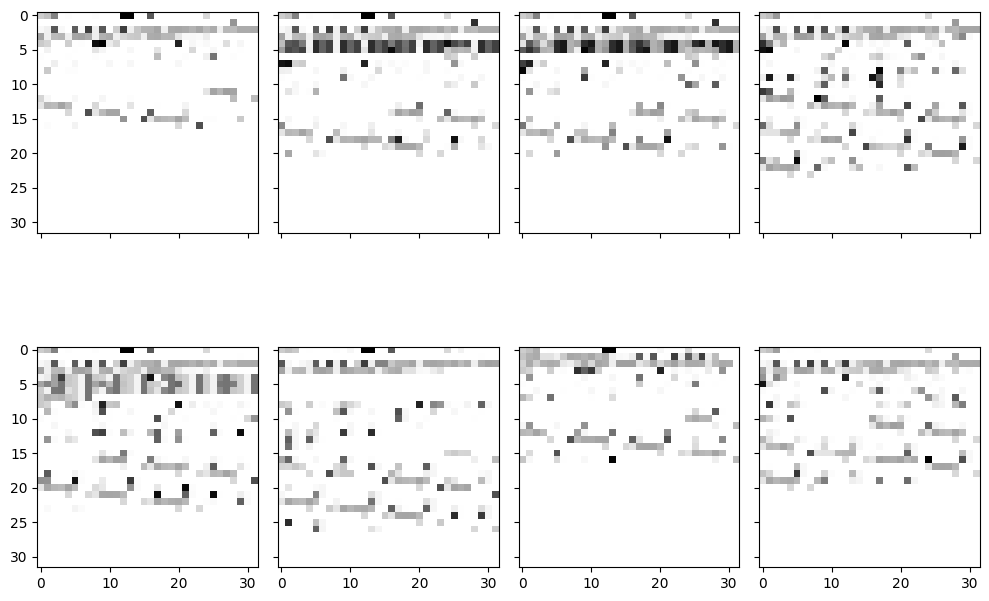

In [15]:
# Plot 8 eight images
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,10), sharex=True, sharey=True)
for index, ax in enumerate(axes.flat):
    ax.imshow(np.array(X[index], ndmin=2).reshape(32,32), cmap='Greys')
    #plt.axis('off')
    plt.tight_layout()
plt.show()

With the executables now available in a format we can use for machine and deep learning <br> 
and since there are no labels, we can use anomaly, outlier or novelty detection via sklearn. <br>
See this link: https://scikit-learn.org/stable/modules/outlier_detection.html <br><br>

If you wish to do anomaly detection via autoencoder,<br>
see this link: https://www.tensorflow.org/tutorials/generative/autoencoder#third_example_anomaly_detection

In [16]:
# Prepare to save the numpy array above
import joblib

In [17]:
# Save the executables numpy array to a  file
joblib.dump(value=X, filename='exe_file_array.npy')

['exe_file_array.npy']

In [18]:
# load the file containing the numpy array of the executables
loaded_np_array = joblib.load(filename='exe_file_array.npy')
loaded_np_array

array([[ 77.,  90., 144., ...,   0.,   0.,   0.],
       [ 77.,  90., 144., ...,   0.,   0.,   0.],
       [ 77.,  90., 144., ...,   0.,   0.,   0.],
       ...,
       [ 77.,  90., 144., ...,   0.,   0.,   0.],
       [ 77.,  90., 144., ...,   0.,   0.,   0.],
       [ 77.,  90., 144., ...,   0.,   0.,   0.]])

Generate some random labels for the purpose of this notebook <br>
Note, I'm not aware of any of the files uses her being malicious. <br>
But because I wish to demonstrate supervise learning, I will add some random labels <br>

In [19]:
# Generate some random labels/targets for a binary classification problem
y = np.random.randint(low=0, high=2, size=X.shape[0])
y

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1])

In [20]:
# Remember, y needs to be reshaped as a new column to be able to stack horizontally
# via a 
y.reshape(-1,1)

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [21]:
# Stack the two to create a dataframe if needed
np.hstack(tup=(X, y.reshape(-1, 1)))

array([[ 77.,  90., 144., ...,   0.,   0.,   1.],
       [ 77.,  90., 144., ...,   0.,   0.,   1.],
       [ 77.,  90., 144., ...,   0.,   0.,   1.],
       ...,
       [ 77.,  90., 144., ...,   0.,   0.,   0.],
       [ 77.,  90., 144., ...,   0.,   0.,   0.],
       [ 77.,  90., 144., ...,   0.,   0.,   1.]])

In [22]:
# Get the shape of X and y
X.shape, y.shape

((27, 1024), (27,))

In [23]:
# With that in place, let's build a quick machine learning model to do supervised learning
from sklearn.linear_model import LogisticRegression

In [24]:
# Setup a machine learning model using Logistic Regression
lr = LogisticRegression(max_iter=300).fit(X=X, y=y)
lr

LogisticRegression(max_iter=300)

In [25]:
# How did the model do on the training set?
# Get some metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [26]:
# Get the accuracy score on the training data
accuracy_score(y_true=y, y_pred=lr.predict(X=X))

1.0

In [27]:
# Prettify the confusion matrix
import seaborn as sns

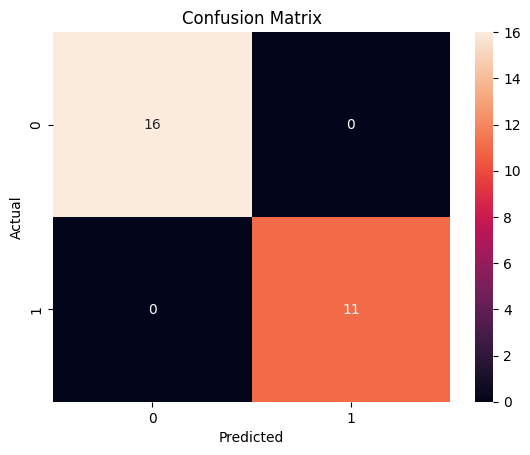

In [28]:
# Get the confusion matrix
# Looking at the confusion matrix, This does not seem so bad
# We learned about metrics in notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y, y_pred=lr.predict(X=X)), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [29]:
# Print the classification report
print(classification_report(y_true=y, y_pred=lr.predict(X=X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [30]:
# Let's wrap this up by build a quick neural network
import tensorflow as tf

In [31]:
# Before getting to Conv2D, it is important that we understand, 
# the conv2d process is not responsible for converting the executable to an image.
# The executable bytes goes through the convolution process.
# We then visualize the operation just as we did above with the raw bytes

sample = np.array(X[0], ndmin=2).reshape(1,1,32,32)
sample


# Create a conv2D layer in Tensorflow
conv = tf.keras.layers.Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), padding='same' )(sample)
conv

<tf.Tensor: shape=(1, 1, 32, 1), dtype=float32, numpy=
array([[[[ -65.22858  ],
         [-158.07104  ],
         [-143.43253  ],
         [-163.86179  ],
         [-115.14611  ],
         [ -45.43284  ],
         [ -31.060041 ],
         [  -5.879653 ],
         [ -16.534828 ],
         [   0.       ],
         [ -10.5844145],
         [  35.470245 ],
         [ -46.383755 ],
         [ -99.8759   ],
         [-158.42746  ],
         [  16.469322 ],
         [  31.484095 ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ],
         [   0.       ]]]], dtype=float32)>

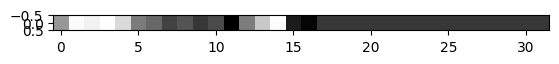

In [32]:
# Plot an image of the first 8 bytes after the convolution operation
plt.imshow(np.squeeze(conv, axis=0), cmap='Greys')

In [33]:
# Once again, just to be clear above, the convolution process did not convert the executable to an image.
# It is just that we produced an image from the result of the conv2D process

In [34]:
X_converted = np.array([ sample.reshape(1,32,32) for sample in X ])
X_converted.shape

(27, 1, 32, 32)

In [35]:
X_converted[0]

array([[[ 77.,  90., 144., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [ 14.,  31., 186., ..., 110., 110., 111.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]])

In [36]:
# Setup a neural network
# Note because we already discussed convolution networks in notebooks:
#   19 - Beginning Deep Learning - Convolution Networks - Tensorflow
#   20 - Beginning Deep Learning - Convolution Networks - PyTorch
# I'm not going to go further with it here.

# However, I will build a simple neural network to make predictions on those executables
model = tf.keras.Sequential(name='exe_sequential')

# Setup the input layer
model.add(tf.keras.layers.Input(shape=X_converted.shape[1:], name='exe_input' ))

# Add a convolution layer
model.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(2,2), strides=(1,1), \
                                 padding='same', name='first_conv2d'))

# Add the Relu Activation Layer
model.add(tf.keras.layers.ReLU(name='first_relu'))

# Add a pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='same', \
                                    name='first_max_pool'))

# Add a second convolution layer
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(2,2), strides=(1,1), \
                                 padding='same', name='second_conv2d'))

# Add the Relu Activation Layer
model.add(tf.keras.layers.ReLU(name='second_relu'))

# Add a flatten layer
model.add(tf.keras.layers.Flatten(name='flatten_layer'))

# Add one dense layer
model.add(tf.keras.layers.Dense(units=32, use_bias=True, name='first_dense'))

# Add the Relu Activation Layer
model.add(tf.keras.layers.ReLU(name='third_relu'))

# Add a dropout layer for regularization. Drop 20 percent of the neurons
model.add(tf.keras.layers.Dropout(rate=0.2, name='dropout'))

# Add the final output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', name='output'))

model.summary()

Model: "exe_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_conv2d (Conv2D)       (None, 1, 32, 4)          516       
                                                                 
 first_relu (ReLU)           (None, 1, 32, 4)          0         
                                                                 
 first_max_pool (MaxPooling2  (None, 1, 32, 4)         0         
 D)                                                              
                                                                 
 second_conv2d (Conv2D)      (None, 1, 32, 8)          136       
                                                                 
 second_relu (ReLU)          (None, 1, 32, 8)          0         
                                                                 
 flatten_layer (Flatten)     (None, 256)               0         
                                                    

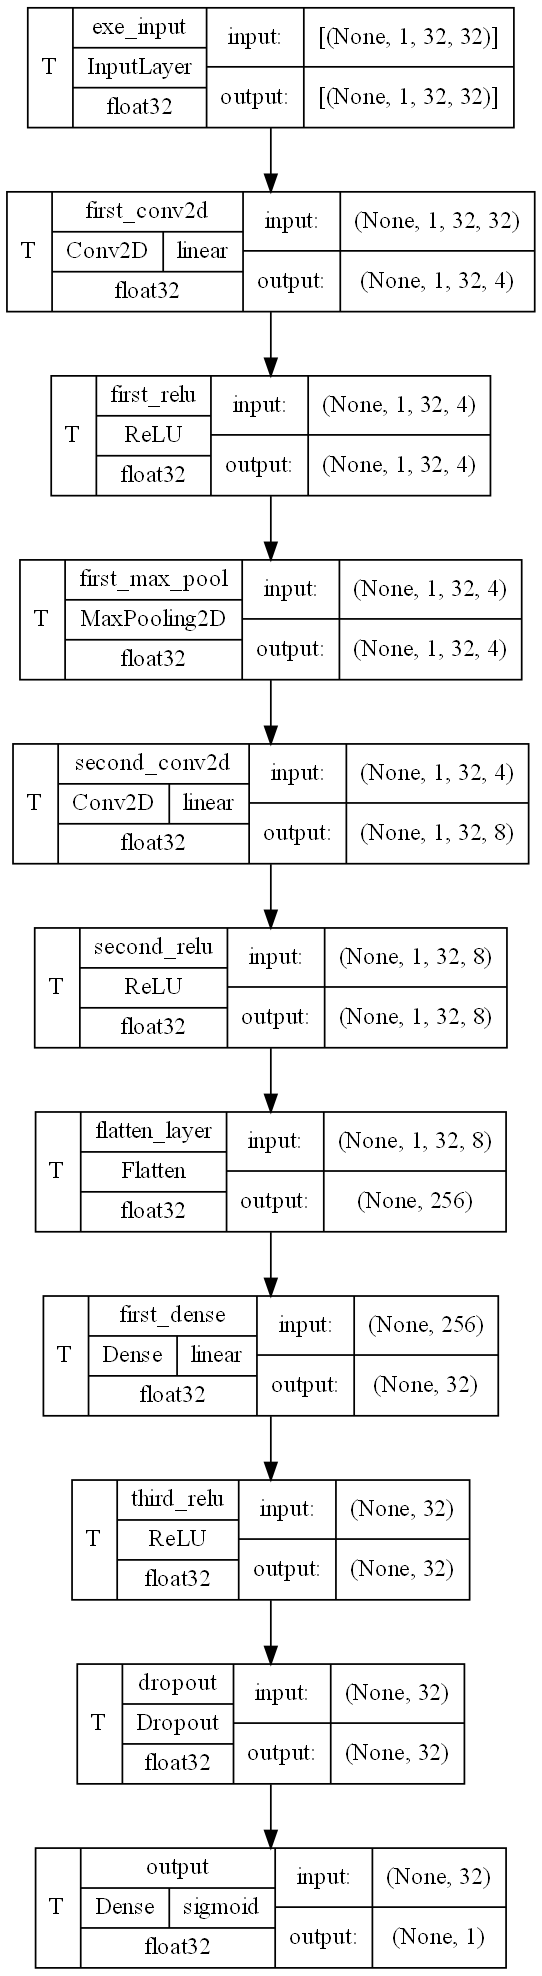

In [37]:
# Get a diagram of the model
tf.keras.utils.plot_model(model=model, show_dtype=True, show_layer_activations=True, \
                          show_layer_names=True, show_shapes=True, show_trainable=True, dpi=125)

In [38]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), \
              loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Fit the model
history = model.fit(x=X_converted, y=y, epochs=10, verbose=1, callbacks=None, \
                    validation_split=0.2, shuffle=True)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 8.1355 - accuracy: 0.5714 - val_loss: 8.8341 - val_accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 38ms/step - loss: 4.5507 - accuracy: 0.8095 - val_loss: 8.2142 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 39ms/step - loss: 2.7154 - accuracy: 0.8571 - val_loss: 8.1557 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 37ms/step - loss: 2.1132 - accuracy: 0.7619 - val_loss: 7.6714 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 35ms/step - loss: 3.9540 - accuracy: 0.6667 - val_loss: 7.1598 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 32ms/step - loss: 6.2640 - accuracy: 0.6190 - val_loss: 6.9240 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 0s 33ms/step - loss: 5.2108 - accuracy: 0.5714 - val_loss: 6.8833 - val_accuracy: 0.6667
Epoch 8/10
1/1 [=============

In [40]:
# What does the history callback look like?
history.history

{'loss': [8.135513305664062,
  4.550742149353027,
  2.7153944969177246,
  2.1132421493530273,
  3.9539918899536133,
  6.263998031616211,
  5.210781574249268,
  4.367542266845703,
  1.8301950693130493,
  2.2555460929870605],
 'accuracy': [0.5714285969734192,
  0.8095238208770752,
  0.8571428656578064,
  0.761904776096344,
  0.6666666865348816,
  0.6190476417541504,
  0.5714285969734192,
  0.6190476417541504,
  0.761904776096344,
  0.8095238208770752],
 'val_loss': [8.834073066711426,
  8.2141695022583,
  8.15572738647461,
  7.67141580581665,
  7.159788608551025,
  6.924027919769287,
  6.883347034454346,
  6.7304229736328125,
  6.562812805175781,
  6.3909993171691895],
 'val_accuracy': [0.3333333432674408,
  0.5,
  0.5,
  0.5,
  0.5,
  0.6666666865348816,
  0.6666666865348816,
  0.6666666865348816,
  0.6666666865348816,
  0.6666666865348816]}

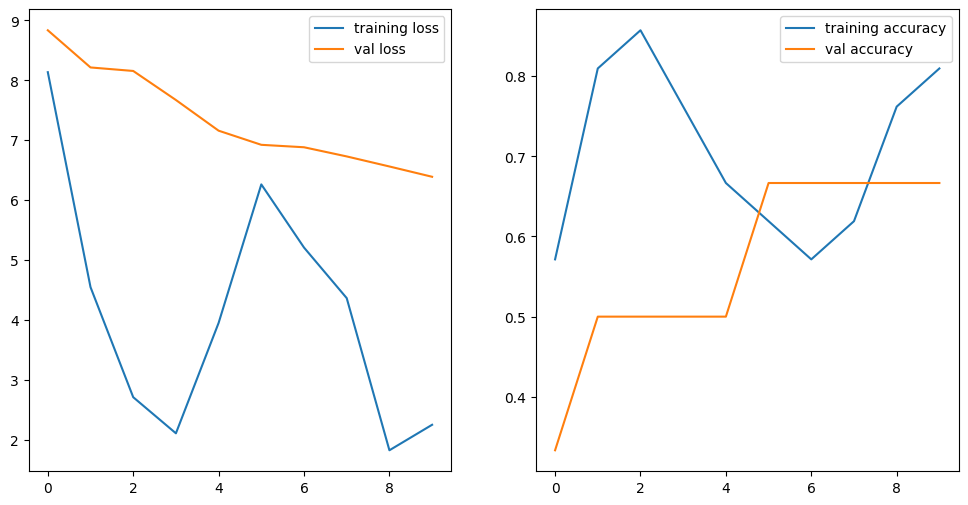

In [41]:
# Plot the loss and accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='val accuracy')
ax2.legend()

In [42]:
# Create deep learning model with PyTorch
import torch
import torchinfo

In [43]:
# Get the shape of X
X.shape

(27, 1024)

In [44]:
# Setup a torch linear model using the Sequential Class
torch_clf_model = torch.nn.Sequential(
    torch.nn.Linear(in_features=X.shape[1], out_features=8),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.2),
    torch.nn.Linear(in_features=8, out_features=1),
    torch.nn.Sigmoid()
)

In [45]:
# Get the summary of the model
torchinfo.summary(torch_clf_model)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            8,200
├─ReLU: 1-2                              --
├─Dropout: 1-3                           --
├─Linear: 1-4                            9
├─Sigmoid: 1-5                           --
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0

In [46]:
# We need to change our data into a Torch Tensor
# Currently it is in 
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [47]:
# To use the data in pytorch we need to change it to a torch tensor. 
# Ensure the data types are all the same
X_torch_linear = torch.tensor(data=X, dtype=torch.float32)

# Notice the reshaping of y also
y = torch.tensor(data=y.reshape(-1,1), dtype=torch.float32)

# Validate the change
type(X_torch_linear), type(y)

(torch.Tensor, torch.Tensor)

In [48]:
# In the following notebooks:
#   13. Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch
#   15. Beginning Deep Learning, - Linear Regression, PyTorch
# the training was all done outside of a function. Rather than rewriting the same code all the time
# time to create a function
def torch_training(model=None, epochs=10, learning_rate=0.01, x_train=X_torch_linear, y_train=y, x_test=X_torch_linear, y_test=y):
    ''' Performs training of the model '''
    # Create to lists to save the training and test loss respectively 
    training_loss, validation_loss = [], []

    # Setup the loss function
    clf_loss_fn = torch.nn.BCELoss()

    # Setup the optimizer
    clf_optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        # Clear the gradients
        clf_optimizer.zero_grad()

        # Train the model
        model.train()

        # Make predictions on the training data
        train_preds = model(x_train)
    
        # Get the loss
        train_loss = clf_loss_fn(train_preds, y_train)
        training_loss.append(train_loss)

        # Calculate the gradients
        train_loss.backward()

        # Upgrade the gradients
        clf_optimizer.step()

        # Evaluate the model at the same time
        model.eval()
        with torch.inference_mode():
            val_preds = model(x_train)

            # Calculate the loss on the validation data
            val_loss = clf_loss_fn(val_preds, y_test)
            validation_loss.append(val_loss)

        if epoch %10 == 0:
            print(f'Epoch: {epoch} \t training loss: {train_loss} \t validation loss {val_loss}')
    
    return model, training_loss, validation_loss

In [49]:
# Call the function with the associated parameters
#(model, train_loss, val_loss) = torch_training(model=torch_clf_model, epochs=300, learning_rate=0.01)
torch_clf_model = torch_training(model=torch_clf_model, epochs=100, learning_rate=0.001)

Epoch: 0 	 training loss: 25.180519104003906 	 validation loss 17.258695602416992
Epoch: 10 	 training loss: 0.469307541847229 	 validation loss 0.327065646648407
Epoch: 20 	 training loss: 0.30612674355506897 	 validation loss 0.20284850895404816
Epoch: 30 	 training loss: 0.24122297763824463 	 validation loss 0.16562414169311523
Epoch: 40 	 training loss: 0.22389963269233704 	 validation loss 0.16087239980697632
Epoch: 50 	 training loss: 0.20600207149982452 	 validation loss 0.15462516248226166
Epoch: 60 	 training loss: 0.1902252435684204 	 validation loss 0.15388263761997223
Epoch: 70 	 training loss: 0.19570954144001007 	 validation loss 0.15243051946163177
Epoch: 80 	 training loss: 0.20159189403057098 	 validation loss 0.15224742889404297
Epoch: 90 	 training loss: 0.20654208958148956 	 validation loss 0.15161001682281494


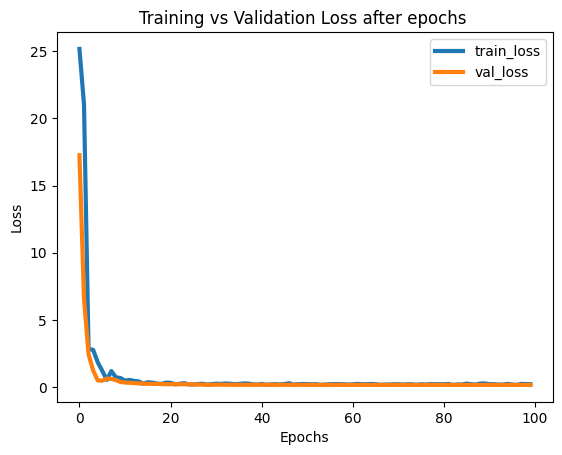

In [50]:
# Plotting the training loss values
plt.title(f'Training vs Validation Loss after epochs ')

# Trying to plot on the "training_loss" by itself will not work
# Matplotlib will more than likely throw an error
# Hence we needed to do "torch.tensor(training_loss).detach().numpy()"
plt.plot(torch.tensor(torch_clf_model[1]).detach().numpy(), lw=3, label='train_loss')
plt.plot(torch.tensor(torch_clf_model[2]).detach().numpy(), lw=3, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
# Make predictions on the test set
# We see the values are continuous
with torch.inference_mode():
    test_preds = torch_clf_model[0](X_torch_linear)

test_preds

tensor([[5.4128e-01],
        [9.9991e-01],
        [9.9932e-01],
        [9.9148e-06],
        [9.8343e-09],
        [9.9140e-01],
        [2.7115e-05],
        [4.5746e-15],
        [3.0175e-14],
        [1.1951e-03],
        [9.9717e-01],
        [5.1370e-18],
        [5.4128e-01],
        [9.9955e-01],
        [9.9930e-01],
        [1.0612e-03],
        [5.4128e-01],
        [4.9415e-04],
        [5.4128e-01],
        [9.4194e-01],
        [4.5064e-04],
        [3.1047e-04],
        [3.8667e-07],
        [2.3936e-16],
        [1.2299e-05],
        [5.4128e-01],
        [5.4128e-01]])

In [52]:
# Notice the rounding of the predictions
# Above we got the probabilities. Can't use the probabilities here
accuracy_score(y_true=y, y_pred=np.round(test_preds))

0.9259259259259259

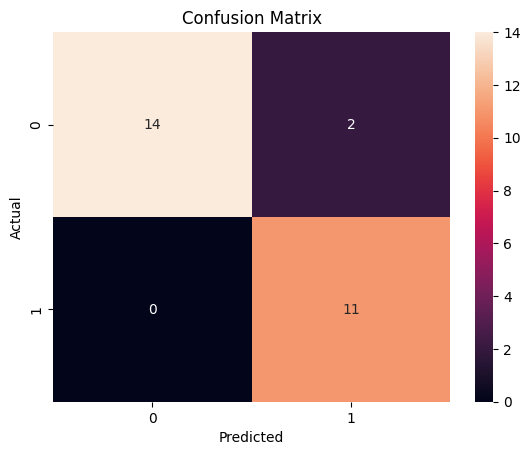

In [53]:
# Looking at the confusion matrix, This does not seem so bad
# We learned about metrics in notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y, y_pred=np.round(test_preds)), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
# Review the classification report
print(classification_report(y_true=y, y_pred=np.round(test_preds)))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        16
         1.0       0.85      1.00      0.92        11

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.93        27
weighted avg       0.94      0.93      0.93        27



In [55]:
# The Dense layers above did not do to bad. 
# Leveraging the same architecture as used with TensorFlow

In [56]:
# Delete me
X_conv2d_torch = [ np.array(i, ndmin=3).reshape(1,32,32) for i in X  ]
X_conv2d_torch = np.asarray(X_conv2d_torch)
X_conv2d_torch, X_conv2d_torch.shape

(array([[[[ 77.,  90., 144., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [ 14.,  31., 186., ..., 110., 110., 111.],
          ...,
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.]]],
 
 
        [[[ 77.,  90., 144., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [ 14.,  31., 186., ..., 110., 110., 111.],
          ...,
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.]]],
 
 
        [[[ 77.,  90., 144., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [ 14.,  31., 186., ..., 110., 110., 111.],
          ...,
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   

In [57]:
X_conv2d_torch = torch.tensor(data=X_conv2d_torch, dtype=torch.float32)
X_conv2d_torch[:5], y[:5], X_conv2d_torch.shape

(tensor([[[[ 77.,  90., 144.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [ 14.,  31., 186.,  ..., 110., 110., 111.],
           ...,
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]],
 
 
         [[[ 77.,  90., 144.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [ 14.,  31., 186.,  ..., 110., 110., 111.],
           ...,
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]],
 
 
         [[[ 77.,  90., 144.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [ 14.,  31., 186.,  ..., 110., 110., 111.],
           ...,
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
           [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
     

In [58]:
# Build the model using subclassing of torch.nn.Module 
class classifier_exe(torch.nn.Module):
    def __init__(self):
        super(classifier_exe, self).__init__()
        
        # Setup the first convolution
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=4, kernel_size=(2,2), \
            stride=(1,1), padding='same')
        self.relu_1 = torch.nn.ReLU()
        self.pool_1 = torch.nn.MaxPool2d(kernel_size=(2,2), stride=(1,1))

        # Setup the second convolution
        self.conv_2 = torch.nn.Conv2d(in_channels=4, out_channels=8, kernel_size=(2,2), stride=(1,1), padding='same')
        self.relu_2 = torch.nn.ReLU()

        # Setup the linear layers
        self.linear_1 = torch.nn.Linear(in_features=7688, out_features=32)
        self.linear_2 = torch.nn.Linear(in_features=32, out_features=1)

        self.relu_3 = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(p=0.2)
        
        # Produce the sigmoid layer
        self.sigmoid = torch.nn.Sigmoid()
    

    def forward(self, x):
        # Apply the first convolution, followed by ReLU and pool
        x = self.conv_1(x)
        x = self.relu_1(x)
        x = self.pool_1(x)

        # Apply the first convolution, followed by ReLU
        x = self.conv_2(x)
        x = self.relu_2(x)

        # Flatten the layer and setup for input into a dense layer
        x = torch.flatten(x, 1)
        x = self.linear_1(x)
        x = self.linear_2(x)

        # Perform ReLU on the linear layer
        x = self.relu_3(x)

        # Perform dropout
        x = self.dropout(x)

        # Leverage sigmoid
        x = self.sigmoid(x)
        
        return x

In [59]:
# Instantiate the class
clf_exe = classifier_exe()

# What does the class look like
clf_exe

classifier_exe(
  (conv_1): Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1), padding=same)
  (relu_1): ReLU()
  (pool_1): MaxPool2d(kernel_size=(2, 2), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(4, 8, kernel_size=(2, 2), stride=(1, 1), padding=same)
  (relu_2): ReLU()
  (linear_1): Linear(in_features=7688, out_features=32, bias=True)
  (linear_2): Linear(in_features=32, out_features=1, bias=True)
  (relu_3): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (sigmoid): Sigmoid()
)

In [60]:
# Get the class dictionary
clf_exe.state_dict()

OrderedDict([('conv_1.weight',
              tensor([[[[ 0.2988,  0.0435],
                        [ 0.3151, -0.4525]]],
              
              
                      [[[ 0.0173,  0.4325],
                        [-0.3246, -0.2309]]],
              
              
                      [[[-0.4540, -0.2068],
                        [-0.2036,  0.1697]]],
              
              
                      [[[-0.0075,  0.1086],
                        [ 0.1962, -0.0759]]]])),
             ('conv_1.bias', tensor([-0.1572, -0.4924, -0.1072,  0.2349])),
             ('conv_2.weight',
              tensor([[[[ 0.2134,  0.0501],
                        [ 0.2483, -0.1917]],
              
                       [[ 0.2214,  0.1746],
                        [ 0.1120, -0.0027]],
              
                       [[-0.1404,  0.1895],
                        [ 0.0172, -0.2492]],
              
                       [[ 0.1055,  0.1464],
                        [ 0.1834, -0.0342]]],
       

In [61]:
# Get a summary of the model
torchinfo.summary(model=clf_exe, depth=5)

Layer (type:depth-idx)                   Param #
classifier_exe                           --
├─Conv2d: 1-1                            20
├─ReLU: 1-2                              --
├─MaxPool2d: 1-3                         --
├─Conv2d: 1-4                            136
├─ReLU: 1-5                              --
├─Linear: 1-6                            246,048
├─Linear: 1-7                            33
├─ReLU: 1-8                              --
├─Dropout: 1-9                           --
├─Sigmoid: 1-10                          --
Total params: 246,237
Trainable params: 246,237
Non-trainable params: 0

In [62]:
# import torchview
from torchview import draw_graph

C:\Users\securitynik\AppData\Roaming\Python\Python310\site-packages\torch\_tensor.py:1295: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ..\aten\src\ATen\native\Convolution.cpp:1004.)
  ret = func(*args, **kwargs)

(dot.exe:6212): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


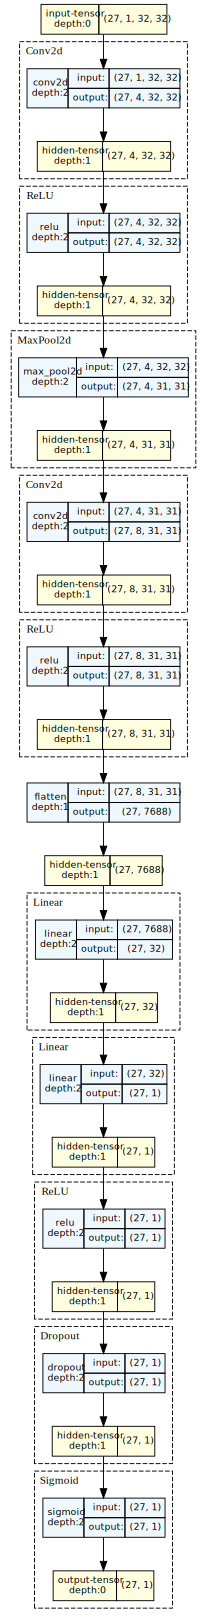

In [63]:
# Plot the model
# https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch
model_graph = draw_graph(model=clf_exe, input_data=X_conv2d_torch, graph_name='torch_conv2d_model', \
                         expand_nested=True, save_graph=False,show_shapes=True, graph_dir='TB', \
                            roll=True, hide_inner_tensors=False, hide_module_functions=False)
model_graph.visual_graph

In [64]:
# Make a prediction on the data before training
clf_exe(X_conv2d_torch)

tensor([[0.9830],
        [0.5000],
        [0.9749],
        [0.5000],
        [0.5066],
        [0.7425],
        [0.5000],
        [0.8855],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.9601],
        [0.5000],
        [0.5000],
        [0.7935],
        [0.5000],
        [0.5000],
        [0.9917],
        [0.9878],
        [0.8065],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.9943],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)

In [65]:
# Setup a function to train the model
def torch_training(model=None, epochs=10, learning_rate=0.001, x_train=X_conv2d_torch, \
    y_train=y, x_test=X_conv2d_torch, y_test=y):
    ''' Performs training of the model '''
    # Create to lists to save the training and test loss respectively 
    training_loss, validation_loss = [], []

    # Setup the loss function
    clf_loss_fn = torch.nn.BCELoss()

    # Setup the optimizer
    clf_optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        # Clear the gradients
        clf_optimizer.zero_grad()

        # Train the model
        model.train()

        # Make predictions on the training data
        train_preds = model(x_train)
    
        # Get the loss
        train_loss = clf_loss_fn(train_preds, y_train)
        training_loss.append(train_loss)

        # Calculate the gradients
        train_loss.backward()

        # Upgrade the gradients
        clf_optimizer.step()

        # Evaluate the model at the same time
        model.eval()
        with torch.inference_mode():
            val_preds = model(x_test)

            # Calculate the loss on the validation data
            val_loss = clf_loss_fn(val_preds, y_test)
            validation_loss.append(val_loss)

        if epoch %10 == 0:
            print(f'Epoch: {epoch} \t training loss: {train_loss} \t validation loss {val_loss}')
    
    return model, training_loss, validation_loss

In [66]:
# Train the model
clf_exe_model = torch_training(model=clf_exe, epochs=100, learning_rate=0.001)

Epoch: 0 	 training loss: 0.8826164603233337 	 validation loss 0.6931471228599548
Epoch: 10 	 training loss: 0.6931471228599548 	 validation loss 0.6931471228599548
Epoch: 20 	 training loss: 0.6931471228599548 	 validation loss 0.6931471228599548
Epoch: 30 	 training loss: 0.6931471228599548 	 validation loss 0.6931471228599548
Epoch: 40 	 training loss: 0.6931471228599548 	 validation loss 0.6931471228599548
Epoch: 50 	 training loss: 0.6931471228599548 	 validation loss 0.6931471228599548
Epoch: 60 	 training loss: 0.6931471228599548 	 validation loss 0.6931471228599548
Epoch: 70 	 training loss: 0.6931471228599548 	 validation loss 0.6931471228599548
Epoch: 80 	 training loss: 0.6931471228599548 	 validation loss 0.6931471228599548
Epoch: 90 	 training loss: 0.6931471228599548 	 validation loss 0.6931471228599548


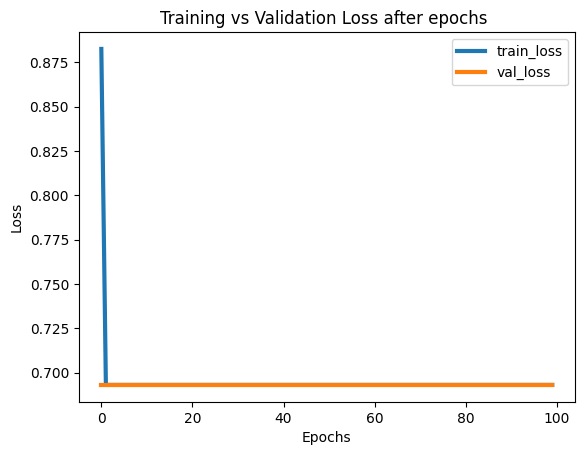

In [67]:
# Plotting the training loss values
plt.title(f'Training vs Validation Loss after epochs ')

# Trying to plot on the "training_loss" by itself will not work
# Matplotlib will more than likely throw an error
# Hence we needed to do "torch.tensor(training_loss).detach().numpy()"
plt.plot(torch.tensor(clf_exe_model[1]).detach().numpy(), lw=3, label='train_loss')
plt.plot(torch.tensor(clf_exe_model[2]).detach().numpy(), lw=3, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [68]:
# Make predictions on the test set
# We see the values are continuous
with torch.inference_mode():
    test_preds = clf_exe_model[0](X_conv2d_torch)

test_preds

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])

In [69]:
# Notice the rounding of the predictions
# Above we got the probabilities. Can't use the probabilities here
accuracy_score(y_true=y, y_pred=np.round(test_preds))

0.5925925925925926

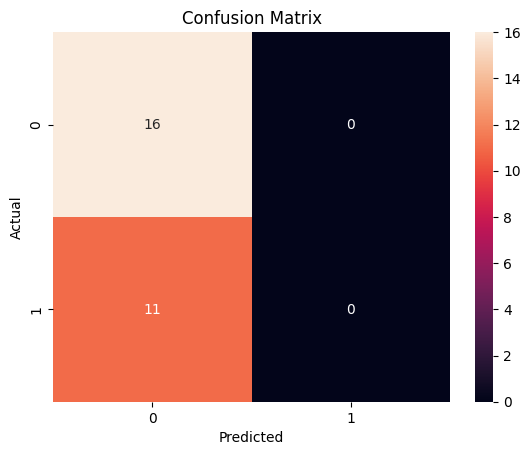

In [70]:
# Looking at the confusion matrix, This does not seem so bad
# We learned about metrics in notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y, y_pred=np.round(test_preds)), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Terrible model!
# The objective was to be able to implement the architecture in the reference. 
# I've done that, using both PyTorch and Tensorflow.
# Moving on

In [ ]:
''' Reference:
https://arxiv.org/ftp/arxiv/papers/2301/2301.11161.pdf
https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
https://machinelearningknowledge.ai/pytorch-conv2d-explained-with-examples/
https://machinelearningmastery.com/building-a-convolutional-neural-network-in-pytorch/
https://machinelearningmastery.com/building-a-convolutional-neural-network-in-pytorch/
'''

In [ ]:
# Well that's it!